# Predicting Diabetes Diagnosis Using Machine Learning: A Comprehensive Analysis of Patient Data

Diabetes is a chronic disease that affects millions of people worldwide, making early detection crucial for better management and treatment. In this analysis, we aim to leverage machine learning techniques to predict whether a patient has diabetes based on various medical attributes. The dataset used for this task comes from the **National Institute of Diabetes and Digestive and Kidney Diseases**, specifically focusing on female patients aged 21 and older of Pima Indian descent.

By exploring this dataset, we will build a predictive model that can diagnose diabetes with high accuracy, using several diagnostic measurements including glucose levels, blood pressure, BMI, and others. The ultimate goal is to create a robust machine learning model capable of predicting the presence of diabetes, offering valuable insights for healthcare professionals and patients alike.

## About the Dataset

This dataset originates from the **National Institute of Diabetes and Digestive and Kidney Diseases**. The objective is to diagnostically predict whether a patient has diabetes based on certain diagnostic measurements included in the dataset. The data specifically focuses on female patients aged 21 years and older of Pima Indian heritage. Several constraints were placed on the selection of the instances from a larger database.

The dataset contains both independent medical predictor variables and one target variable, **Outcome**, which indicates whether a patient has diabetes or not.

## Variables

- **Pregnancies**: Number of pregnancies.
- **Glucose**: 2-hour plasma glucose concentration in the oral glucose tolerance test.
- **Blood Pressure**: Blood pressure (mm Hg).
- **Skin Thickness**: Skin thickness.
- **Insulin**: 2-hour serum insulin (mu U/ml).
- **DiabetesPedigreeFunction**: Diabetes pedigree function.
- **BMI**: Body Mass Index.
- **Age**: Age (in years).
- **Outcome**: Diabetes diagnosis (1 = positive, 0 = negative).

## Techniques and Tools Used

This analysis will employ several tools and techniques, including:

- **Exploratory Data Analysis (EDA)**: To understand the distribution and relationships between variables.
- **Correlation Analysis**: To examine how variables are related to one another.
- **Feature Engineering**: To improve model performance by creating new features and modifying existing ones.
- **Data Preprocessing**: Including handling missing values, outliers, and encoding categorical variables.
- **Model Building**: The following machine learning models will be utilized:
  - **RandomForestClassifier**
  - **Logistic Regression**
  - **K-Nearest Neighbors (KNN)**
  - **Support Vector Classifier (SVC)**
  - **Decision Tree Classifier**
  - **AdaBoost Classifier**
  - **Gradient Boosting Classifier**
  - **XGBoost Classifier**
  - **LightGBM Classifier**
  
- **Hyperparameter Optimization**: Using techniques like grid search and random search to find the optimal settings for the models.
- **Model Evaluation**: Comparing the performance of various models using metrics like accuracy, precision, recall, and F1 score.
- **Visualization**: To display model performance and feature importance.

The overall goal is to build a predictive model that can effectively diagnose diabetes based on the provided medical features.


## Libraries and Tools

To efficiently analyze the dataset and build a machine learning model for diabetes prediction, we utilize a variety of libraries and tools, each serving a specific purpose:

### Data Handling & Manipulation  
- **NumPy** (`numpy`): Efficient numerical operations.  
- **Pandas** (`pandas`): Data manipulation and analysis.  

### Data Visualization  
- **Matplotlib** (`matplotlib.pyplot`): Basic plotting and visualizations.  
- **Seaborn** (`seaborn`): Statistical data visualization.  
- **Plotly** (`plotly.express`, `plotly.graph_objects`): Interactive and advanced visualizations.  

### Machine Learning & Model Evaluation  
- **Scikit-learn** (`sklearn`):  
  - Model training: `RandomForestClassifier`, `LogisticRegression`, `KNeighborsClassifier`, `SVC`, `DecisionTreeClassifier`, `AdaBoostClassifier`, `GradientBoostingClassifier`.  
  - Model evaluation: `accuracy_score`, `precision_score`, `recall_score`, `f1_score`, `roc_auc_score`.  
  - Hyperparameter tuning: `GridSearchCV`, `cross_validate`.  
  - Data preprocessing: `StandardScaler`, `RobustScaler`, `LabelEncoder`, `KNNImputer`.  
  - Train-test splitting: `train_test_split`.  

- **XGBoost** (`xgboost`): Optimized gradient boosting for classification.  
- **LightGBM** (`lightgbm`): High-performance gradient boosting.  

### Miscellaneous  
- **Itertools** (`itertools`): Advanced iteration tools.  
- **Warnings** (`warnings`): Suppressing unnecessary warnings for a cleaner output.  

Each of these tools plays a crucial role in preparing, visualizing, modeling, and evaluating our dataset for effective diabetes prediction. 🚀


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import itertools
import plotly.graph_objects as go

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.simplefilter(action="ignore")

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


## Configuring Pandas Display Options

To improve the readability of our dataset when displayed in the notebook, we configure **Pandas display options** as follows:  

- **`display.max_columns = None`** → Ensures all columns are displayed without truncation.  
- **`display.width = None`** → Automatically adjusts the display width to fit the notebook output.  
- **`display.max_rows = 20`** → Limits the number of displayed rows to 20 for better readability.  
- **`display.float_format = lambda x: '%.3f' % x`** → Formats floating-point numbers to 3 decimal places for consistency.  

These settings help us visualize the dataset more effectively without losing important details.


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Loading the Dataset  

The diabetes dataset is imported using Pandas, allowing us to structure and manipulate the data efficiently. This dataset will serve as the foundation for exploratory data analysis (EDA) and machine learning modeling.  

By loading the data into a DataFrame, we can seamlessly perform operations such as filtering, transformation, and visualization, facilitating a deeper understanding of the relationships between variables and their impact on diabetes prediction.  

In [3]:
df = pd.read_csv("diabetes.csv")

## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a crucial phase in any data analysis project. In this stage, our goal is to better understand the dataset, explore the relationships between variables, and detect possible patterns, trends, and anomalies.  

During EDA, we focus on identifying:

- The **structure** and **content** of the dataset (size, variable types).
- **Missing values** and their impact on the analysis.
- The **distributions** of numerical and categorical variables.
- **Correlations** between variables that might influence the predictive model.

EDA provides the initial insights needed to make informed decisions about how to proceed with data preparation and model construction. It is essential to ensure that the dataset's quality is suitable for further analysis.

In this project, we will use various tools and methods to explore our dataset and gain a better understanding of the relationships between the variables.  

The **`check_df()`** function is designed to perform a quick preliminary analysis of our dataset to provide an organized overview. When running this function, several key metrics are presented that will help us evaluate the data's quality and characteristics.

#### Description of Each Section:

- **Shape**: Displays the number of rows and columns in the DataFrame. This gives us an idea of the dataset's size.

- **Data Types**: Shows the data types of each column (e.g., integer, float, object). This is important to ensure the data is in the correct format for further analysis.

- **Head and Tail**: Displays the first and last few rows of the dataset. This allows us to quickly inspect the first and last entries to identify potential inconsistencies or patterns.

- **Missing Values**: Calculates and shows the number of missing (NaN) values in each column. Identifying missing values is essential for deciding how to handle them (e.g., removal, imputation, etc.).

- **Unique Values**: Shows the number of unique values in each column. This helps us understand the diversity of data in each variable, especially for categorical columns.

- **Summary Statistics**: Provides key descriptive statistics such as mean, standard deviation, min, max, and percentiles. This is useful for understanding the distribution of numerical variables.

- **Quantiles**: Displays selected percentiles (0, 5, 50, 95, 99, 100) of numerical columns. This helps identify the spread of data and potential outliers.

By running this function at the start of the analysis, we gain a general understanding of the dataset, allowing us to make informed decisions about how to handle missing values, outliers, and other critical aspects before moving forward with modeling.  


In [4]:
def check_df(dataframe, head=5):
    """
    Provides an overview of a Pandas DataFrame, displaying key statistics and structure.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame to analyze.
    head (int): Number of rows to display in the head() and tail() sections.

    Returns:
    None
    """
    print("##################### Shape #####################")
    print(f"Rows: {dataframe.shape[0]}, Columns: {dataframe.shape[1]}\n")

    print("##################### Data Types #####################")
    print(dataframe.dtypes, "\n")

    print("##################### Head #####################")
    print(dataframe.head(head), "\n")

    print("##################### Tail #####################")
    print(dataframe.tail(head), "\n")

    print("##################### Missing Values #####################")
    na_counts = dataframe.isnull().sum()
    print(na_counts[na_counts > 0] if na_counts.sum() > 0 else "No missing values", "\n")

    print("##################### Unique Values #####################")
    print(dataframe.nunique(), "\n")

    print("##################### Summary Statistics #####################")
    print(dataframe.describe().T, "\n")

    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

# Execute function
check_df(df)


##################### Shape #####################
Rows: 768, Columns: 9

##################### Data Types #####################
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object 

##################### Head #####################
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  \
0            6      148             72             35        0 33.600                     0.627   
1            1       85             66             29        0 26.600                     0.351   
2            8      183             64              0        0 23.300                     0.672   
3            1       89             66             23       94 28.100                  

## Identifying and Classifying Numeric and Categorical Variables

In any data analysis or machine learning project, one of the first steps is to understand the types of variables in the dataset. This is crucial because the way we handle variables depends on whether they are numerical or categorical.

### Types of Variables
1. **Numerical Variables**:
   - These are variables that represent quantifiable values and can be discrete (like the number of items) or continuous (like height, weight, or age).
   - Examples include: `Age`, `Blood Pressure`, `BMI`, `Glucose`.

2. **Categorical Variables**:
   - These variables represent categories or groups. They usually take on a limited, fixed number of values, and the categories might not have a specific order.
   - Examples include: `Gender`, `Outcome` (diabetes positive/negative), `SkinThickness` (may be treated as categorical depending on analysis).

### Importance of Identifying Variable Types
Correctly identifying the type of each variable helps us make decisions about:
- **Data Preprocessing**: Numerical variables may need scaling or normalization, while categorical variables might require encoding techniques like One-Hot Encoding or Label Encoding.
- **Analysis & Modeling**: Some machine learning models or statistical tests require different treatments for numerical vs categorical variables.

### Categorizing Variables
To classify the variables into numerical and categorical, we typically rely on:
- **Data Type**: Checking the data type of each column (e.g., integer, float, object).
- **Unique Value Count**: For numerical variables with few unique values (e.g., binary or limited range), it might make sense to treat them as categorical.
- **Business Context**: Sometimes, a variable that is numerical might be better treated as categorical based on the domain knowledge or the analysis objective.

### Process Overview
1. **Identify Categorical Variables**: These variables are usually of type "object" or string, but sometimes numerical columns with a small number of unique values can also be treated as categorical.
2. **Identify Numerical Variables**: These are variables of type integer or float that contain continuous or discrete data. However, numerical variables with a very limited range of unique values may need to be categorized.
3. **Distinguish Special Cases**: Some variables may have characteristics that allow them to belong to both categories, such as "numerical but categorical" or "categorical but cardinal." These cases often require additional scrutiny.

### Benefits of Capturing Variable Types
- **Efficient Data Processing**: By accurately categorizing variables, we can efficiently preprocess data, apply the correct transformations, and choose the right algorithms for analysis.
- **Improved Model Accuracy**: Knowing the nature of the data ensures the right model is selected, and appropriate techniques are applied for feature engineering, thus improving the performance of the machine learning model.

In summary, identifying and categorizing numeric and categorical variables is an essential first step in the data exploration process. It lays the foundation for proper data handling, effective analysis, and better decision-making in model building.

In [5]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Classify columns in a dataframe into categorical and numerical columns
    based on their characteristics such as data type and number of unique values.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame to analyze.
    cat_th (int): Threshold for categorizing columns with fewer unique values as categorical.
    car_th (int): Threshold for categorizing columns with more unique values as categorical.

    Returns:
    cat_cols (list): List of categorical columns.
    num_cols (list): List of numerical columns.
    cat_but_car (list): List of columns that are categorical but have more than 'car_th' unique values.
    num_but_cat (list): List of columns that are numerical but have fewer than 'cat_th' unique values.
    """

    # Identify categorical columns (those with object type)
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == "O"]

    # Identify numerical columns with fewer unique values (treated as categorical)
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtype != "O"]

    # Identify categorical columns with more than 'car_th' unique values (treated as cardinal)
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtype == "O"]

    # Merge regular categorical columns with those identified as numerical but categorical
    cat_cols = list(set(cat_cols + num_but_cat) - set(cat_but_car))  # Remove columns that are categorical but cardinal

    # Identify numerical columns excluding those that are treated as categorical
    num_cols = [col for col in dataframe.columns if dataframe[col].dtype != "O" and col not in num_but_cat]

    # Summary statistics
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"Categorical Columns (cat_cols): {len(cat_cols)}")
    print(f"Numerical Columns (num_cols): {len(num_cols)}")
    print(f"Categorical but Cardinal (cat_but_car): {len(cat_but_car)}")
    print(f"Numerical but Categorical (num_but_cat): {len(num_but_cat)}")

    return cat_cols, num_cols, cat_but_car, num_but_cat

### Variable Classification Results 📊

After running the function **`grab_col_names(df)`**, we have classified the columns in the dataset into different categories based on their data types and the number of unique values they contain. Here's a summary of the classification results:

- **Observations**: The dataset contains a total of 768 observations (rows).
- **Variables**: The dataset has 9 variables (columns).

### Classification of Variables:

1. **Categorical Columns (cat_cols)**:
   - **Count**: 1
   - These are columns where the values represent categories or groups. In our dataset, only one column is identified as categorical.

2. **Numerical Columns (num_cols)**:
   - **Count**: 8
   - These columns contain numerical values, representing measurable quantities. Our dataset has 8 numerical variables, which are essential for statistical analysis and machine learning.

3. **Categorical but Cardinal (cat_but_car)**:
   - **Count**: 0
   - There are no categorical columns that have more than 20 unique values. Typically, these columns would require special handling (e.g., they could be treated as cardinal variables with unique values).

4. **Numerical but Categorical (num_but_cat)**:
   - **Count**: 1
   - This category contains variables that are numerical in type but have a limited number of unique values. In our case, one numerical column is treated as categorical due to its limited range of unique values.

In [6]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)

Observations: 768
Variables: 9
Categorical Columns (cat_cols): 1
Numerical Columns (num_cols): 8
Categorical but Cardinal (cat_but_car): 0
Numerical but Categorical (num_but_cat): 1


Based on this classification, we can proceed with appropriate data preprocessing steps. For instance, categorical columns may need encoding, while numerical columns may require scaling or normalization. Additionally, understanding how many columns belong to each type helps in choosing the right machine learning models and strategies for feature engineering.

The function has identified the following column as categorical:

- **`Outcome`**: This column represents the target variable in the dataset, indicating whether a patient has diabetes or not. It contains two possible values: `1` (diabetic) and `0` (non-diabetic). Despite being a numerical column (with values 0 and 1), it is treated as categorical because it represents a classification or group, rather than a continuous quantity.

Although the `Outcome` column contains numeric values (0 and 1), it is a **binary classification variable**, making it a categorical feature. It does not represent a continuous range of values, but rather two distinct categories or classes, which is why it is categorized as a **categorical variable** in this dataset.

In [7]:
cat_cols

['Outcome']

The function has identified the following columns as numerical:

- **`Pregnancies`**: The number of pregnancies a patient has had.
- **`Glucose`**: The 2-hour plasma glucose concentration during an oral glucose tolerance test.
- **`BloodPressure`**: The blood pressure value (measured in mm Hg).
- **`SkinThickness`**: The thickness of the skin at the triceps (in mm).
- **`Insulin`**: The 2-hour serum insulin level (in µU/ml).
- **`BMI`**: The Body Mass Index (BMI) of the patient.
- **`DiabetesPedigreeFunction`**: A function that represents the genetic relationship of the patient to diabetes.
- **`Age`**: The age of the patient (in years).

These columns represent quantitative data and contain continuous or discrete numeric values. They measure variables such as glucose levels, blood pressure, BMI, and age, all of which are essential for making predictions in machine learning models. These numerical columns will be used for statistical analysis and model training in the next steps of the project.


In [8]:
num_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

No columns have been identified as **Categorical but Cardinal (cat_but_car)** in this dataset.

**Categorical but Cardinal** refers to categorical variables that contain a large number of unique values (typically more than 20), which would require special handling due to their complexity. These variables are usually not suitable for one-hot encoding and might need to be treated as numerical variables or aggregated into fewer categories.

Since no columns fall into this category, we can proceed with handling categorical variables in the usual manner, such as encoding the `Outcome` variable.

In [9]:
cat_but_car

[]

The following column has been identified as **Numerical but Categorical (num_but_cat)**:

- **`Outcome`**: This is the target variable of the dataset, indicating whether a patient has diabetes (`1`) or not (`0`).

While the `Outcome` column contains numeric values (0 and 1), it is treated as categorical because it represents a binary classification, not a continuous quantity. The values (0 and 1) signify two distinct categories (diabetic vs. non-diabetic), making it a categorical feature despite being numeric. This column is used for classification tasks, so it is classified as **Numerical but Categorical**.

In this case, the column is treated numerically for modeling purposes but conceptually remains categorical.

In [10]:
num_but_cat

['Outcome']

### Analysis of Categorical Variables

In this section, we perform an analysis of the categorical variables in the dataset, focusing on their distribution and the proportion of each category. This analysis is crucial for understanding how the different categories are represented in the dataset, which in turn informs decisions related to feature engineering, encoding methods, and model selection.

To conduct the analysis, we define a function that:
1. Displays the frequency count of each unique value in the categorical column.
2. Shows the ratio or percentage of each category relative to the total number of observations.

This function allows us to view both numerical summaries and visual representations of the distribution of each categorical variable. If the data contains multiple categorical variables, we can analyze them sequentially, ensuring a thorough examination of all relevant features.

### Insights:
The analysis of categorical variables helps us:
- Understand the distribution of categories within each categorical variable.
- Identify any potential imbalances in the data, which is important for classification tasks.
- Visualize the relationships between categories, allowing us to see whether certain categories dominate or if the data is well-distributed.

By reviewing both the numerical and graphical summaries of categorical variables, we gain valuable insights into how each category is distributed and whether any additional preprocessing steps (e.g., balancing the dataset) are necessary before model training.


In [15]:
def cat_summary(dataframe, col_name, plot=False):
    """
    Summarizes and visualizes a categorical column in the dataset.

    Parameters:
    dataframe (pandas.DataFrame): The dataset containing the column to analyze.
    col_name (str): The name of the categorical column to summarize.
    plot (bool, optional): Whether to display a plot of the categorical distribution. Default is False.

    Returns:
    None
    """
    # Check if the column exists in the dataframe
    if col_name not in dataframe.columns:
        raise ValueError(f"Column '{col_name}' not found in the dataframe.")

    # Calculate value counts and percentages
    value_counts = dataframe[col_name].value_counts()
    value_ratios = 100 * value_counts / len(dataframe)

    # Display the summary
    summary_df = pd.DataFrame({col_name: value_counts, "Ratio (%)": value_ratios})
    print(summary_df)

    # Print a separator for better readability
    print("\n" + "#" * 40)

    # Display a plot if requested
    if plot:
        plt.figure(figsize=(8, 6))
        sns.countplot(x=dataframe[col_name], data=dataframe, palette='Set2')
        plt.title(f"Distribution of {col_name}", fontsize=14)
        plt.xlabel(col_name, fontsize=12)
        plt.ylabel("Count", fontsize=12)
        plt.xticks(rotation=45)
        plt.show()

### Explanation of Single Categorical Variable Handling

In this dataset, there is only one categorical variable, the **`Outcome`** column. Since we only have a single categorical feature to analyze, we directly apply the `cat_summary()` function to it without needing to loop over multiple categorical variables. This is why the function is called explicitly for the **`Outcome`** column.

If there were more categorical variables in the dataset, we would typically loop through all of them and apply the function to each one individually. This approach helps us maintain flexibility in case the dataset grows and more categorical features are added.

By setting `plot=True`, we request the function to also display a visual representation (a count plot) of the distribution of the **`Outcome`** variable.


         Outcome  Ratio (%)
Outcome                    
0            500     65.104
1            268     34.896

########################################


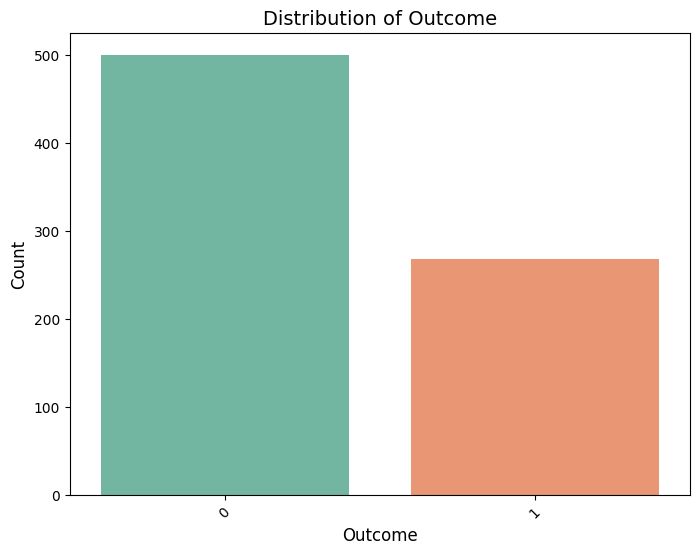

In [16]:
cat_summary(df, "Outcome", plot=True)

### Handling Multiple Categorical Variables

If the dataset contains more than one categorical variable, we can apply the **`cat_summary()`** function to each categorical column sequentially. To do this, we would loop through all categorical columns and call the function for each one. This allows for consistent analysis of each categorical variable, ensuring that we gain insights into the distribution and frequency of each category across the dataset.

In the example provided, the loop iterates through the list of categorical columns (`cat_cols`), applying the **`cat_summary()`** function to each column. This would result in a summary and visualization (if `plot=True`) for every categorical variable in the dataset.

By running this loop, we ensure that all categorical variables are analyzed in the same way, making it easy to compare their distributions and detect potential issues, such as imbalances or unusual patterns, across multiple features.


         Outcome  Ratio (%)
Outcome                    
0            500     65.104
1            268     34.896

########################################


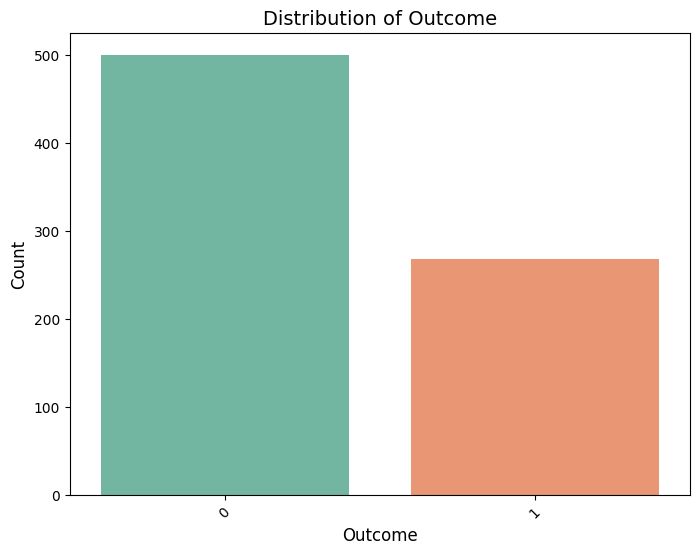

In [17]:
for col in cat_cols:
    cat_summary(df, col, plot=True)

## Analysis of Numerical Variables

In this section, we will analyze the numerical variables present in the dataset. This involves examining their summary statistics and distribution to better understand the underlying data.

### Summary Statistics

For each numerical column in the dataset, we compute basic summary statistics, which include:

- **Count**: The number of non-null entries in the column.
- **Mean**: The average value of the column.
- **Standard Deviation (std)**: The measure of variability or dispersion of the values.
- **Min**: The smallest value in the column.
- **25th Percentile (25%)**: The value below which 25% of the data fall.
- **Median (50%)**: The middle value that divides the data into two equal halves.
- **75th Percentile (75%)**: The value below which 75% of the data fall.
- **Max**: The largest value in the column.

Additionally, we can calculate specific **quantiles** (e.g., 5th, 10th, 20th, 30th, etc.) to get a more detailed understanding of how the data is distributed across the range of values.

### Distribution Visualization

To better understand the distribution of each numerical variable, we plot a histogram for each column. The histogram visualizes the frequency of different ranges of values and helps us see whether the data follows a normal distribution, is skewed, or has any outliers.

A **Kernel Density Estimate (KDE)** curve is often added to the histogram to smooth out the distribution and show the estimated probability density function of the numerical data.

### Process and Key Insights

1. **Descriptive Statistics**: The function computes the basic descriptive statistics for each numerical column, providing insights into central tendency, spread, and the range of values.
   
2. **Quantile Calculation**: We can customize the quantiles to get a more granular view of the distribution, such as the 5th, 10th, 20th percentiles, and so on. This helps identify patterns or skewness in the data.

3. **Visual Representation**: The histograms (along with the KDE curve) allow us to visually assess the distribution of each numerical feature. This visualization can highlight key characteristics, such as:

   - Normal distribution
   - Skewed distribution (either left or right)
   - Presence of outliers
   - Potential issues like highly concentrated values


By analyzing the numerical variables through summary statistics and distribution plots, we gain a deeper understanding of the dataset's characteristics. This allows us to make informed decisions on further data preprocessing steps, such as normalization, handling of outliers, or feature transformations.

In the next steps, we may focus on specific variables that show potential issues (e.g., skewness or outliers) and address them accordingly to improve the performance of machine learning models.


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

def num_summary(dataframe, numerical_col, plot=False, quantiles=None, bins=20):
    """
    Summarizes and visualizes a numerical column in the dataset.

    Parameters:
    dataframe (pandas.DataFrame): The dataset containing the numerical column to analyze.
    numerical_col (str): The name of the numerical column to summarize.
    plot (bool, optional): Whether to display a histogram of the numerical distribution. Default is False.
    quantiles (list, optional): A custom list of quantiles to display in the summary. Default is a predefined set.
    bins (int, optional): The number of bins to use in the histogram. Default is 20.

    Returns:
    None
    """
    # Set default quantiles if none are provided
    if quantiles is None:
        quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]

    # Check if the column exists in the dataframe
    if numerical_col not in dataframe.columns:
        raise ValueError(f"Column '{numerical_col}' not found in the dataframe.")

    # Calculate and display summary statistics
    print(f"Summary statistics for {numerical_col}:")
    summary = dataframe[numerical_col].describe().T
    quantile_values = dataframe[numerical_col].quantile(quantiles)

    # Print summary and quantiles
    print(summary)
    print("\nQuantiles:")
    print(quantile_values)
    print("\n" + "#" * 40)

    # Plot histogram if requested
    if plot:
        plt.figure(figsize=(8, 6))
        sns.histplot(dataframe[numerical_col], kde=True, bins=bins, color="skyblue", stat="density")
        plt.title(f"Distribution of {numerical_col}", fontsize=14)
        plt.xlabel(numerical_col, fontsize=12)
        plt.ylabel("Density", fontsize=12)
        plt.show()

Summary statistics for Pregnancies:
count   768.000
mean      3.845
std       3.370
min       0.000
25%       1.000
50%       3.000
75%       6.000
max      17.000
Name: Pregnancies, dtype: float64

Quantiles:
0.050    0.000
0.100    0.000
0.200    1.000
0.300    1.000
0.400    2.000
0.500    3.000
0.600    4.000
0.700    5.000
0.800    7.000
0.900    9.000
0.950   10.000
0.990   13.000
Name: Pregnancies, dtype: float64

########################################


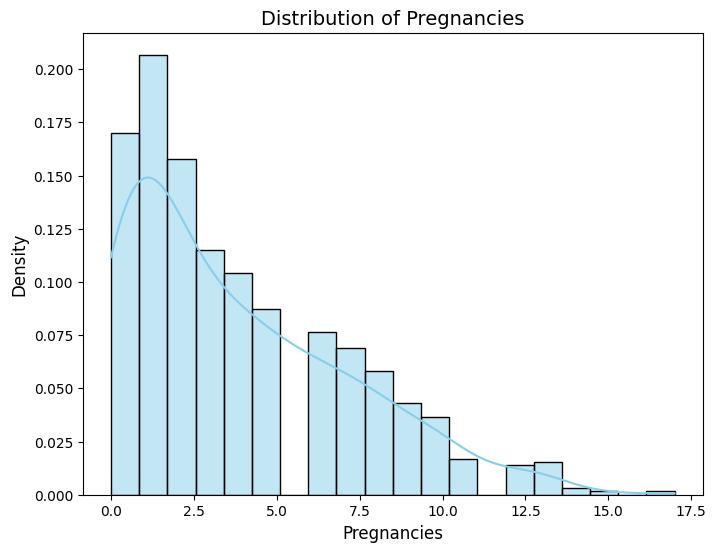

Summary statistics for Glucose:
count   768.000
mean    120.895
std      31.973
min       0.000
25%      99.000
50%     117.000
75%     140.250
max     199.000
Name: Glucose, dtype: float64

Quantiles:
0.050    79.000
0.100    85.000
0.200    95.000
0.300   102.000
0.400   109.000
0.500   117.000
0.600   125.000
0.700   134.000
0.800   147.000
0.900   167.000
0.950   181.000
0.990   196.000
Name: Glucose, dtype: float64

########################################


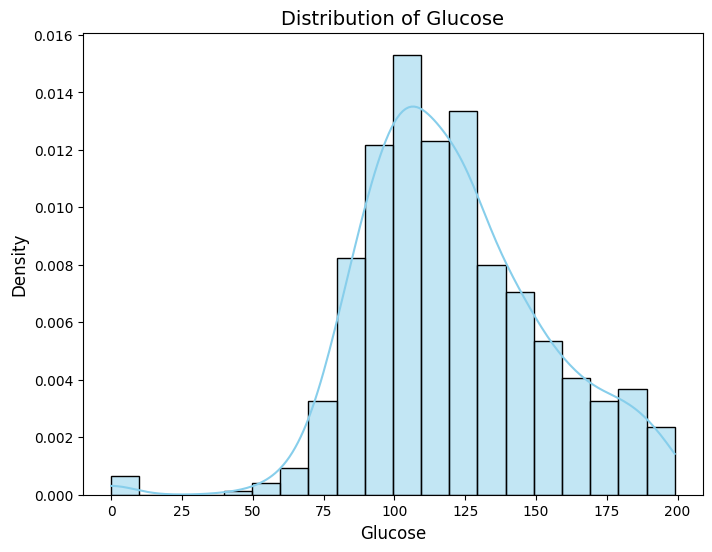

Summary statistics for BloodPressure:
count   768.000
mean     69.105
std      19.356
min       0.000
25%      62.000
50%      72.000
75%      80.000
max     122.000
Name: BloodPressure, dtype: float64

Quantiles:
0.050    38.700
0.100    54.000
0.200    60.000
0.300    64.000
0.400    68.000
0.500    72.000
0.600    74.000
0.700    78.000
0.800    82.000
0.900    88.000
0.950    90.000
0.990   106.000
Name: BloodPressure, dtype: float64

########################################


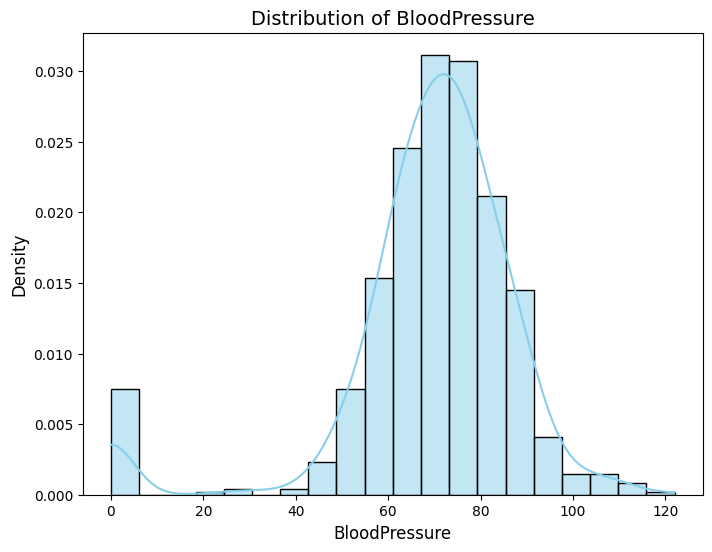

Summary statistics for SkinThickness:
count   768.000
mean     20.536
std      15.952
min       0.000
25%       0.000
50%      23.000
75%      32.000
max      99.000
Name: SkinThickness, dtype: float64

Quantiles:
0.050    0.000
0.100    0.000
0.200    0.000
0.300    8.200
0.400   18.000
0.500   23.000
0.600   27.000
0.700   31.000
0.800   35.000
0.900   40.000
0.950   44.000
0.990   51.330
Name: SkinThickness, dtype: float64

########################################


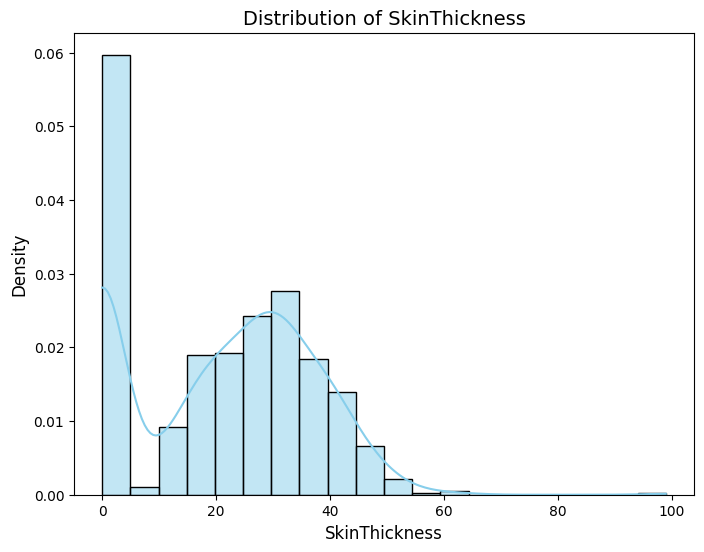

Summary statistics for Insulin:
count   768.000
mean     79.799
std     115.244
min       0.000
25%       0.000
50%      30.500
75%     127.250
max     846.000
Name: Insulin, dtype: float64

Quantiles:
0.050     0.000
0.100     0.000
0.200     0.000
0.300     0.000
0.400     0.000
0.500    30.500
0.600    72.200
0.700   106.000
0.800   150.000
0.900   210.000
0.950   293.000
0.990   519.900
Name: Insulin, dtype: float64

########################################


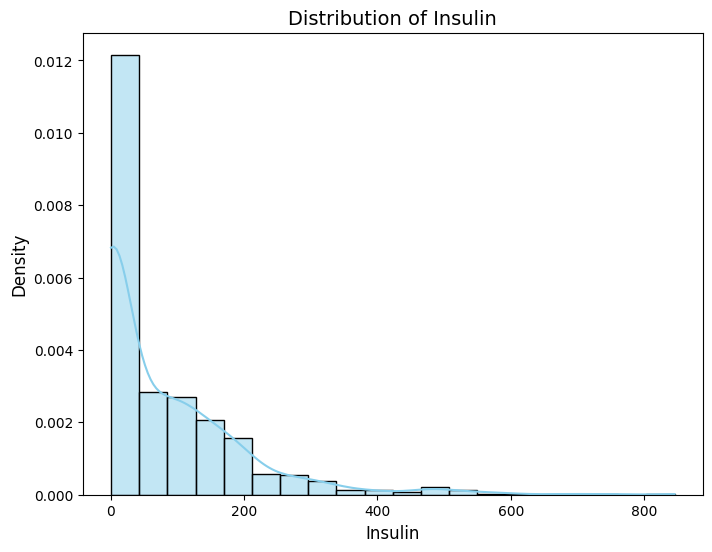

Summary statistics for BMI:
count   768.000
mean     31.993
std       7.884
min       0.000
25%      27.300
50%      32.000
75%      36.600
max      67.100
Name: BMI, dtype: float64

Quantiles:
0.050   21.800
0.100   23.600
0.200   25.900
0.300   28.200
0.400   30.100
0.500   32.000
0.600   33.700
0.700   35.490
0.800   37.800
0.900   41.500
0.950   44.395
0.990   50.759
Name: BMI, dtype: float64

########################################


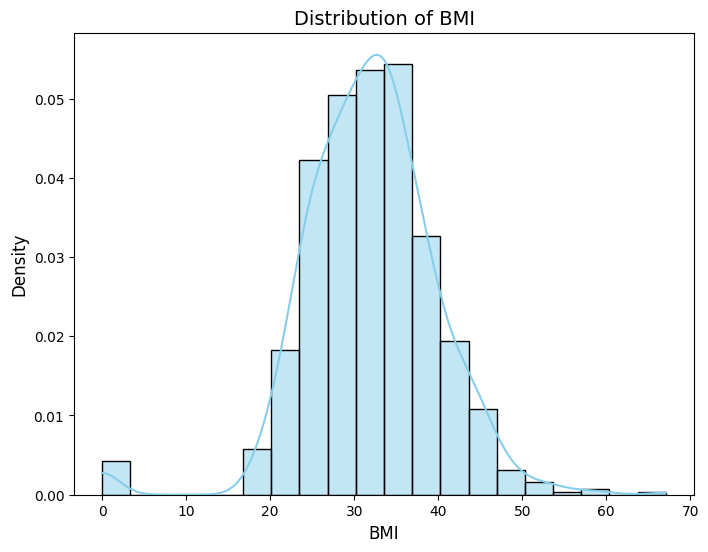

Summary statistics for DiabetesPedigreeFunction:
count   768.000
mean      0.472
std       0.331
min       0.078
25%       0.244
50%       0.372
75%       0.626
max       2.420
Name: DiabetesPedigreeFunction, dtype: float64

Quantiles:
0.050   0.140
0.100   0.165
0.200   0.219
0.300   0.259
0.400   0.303
0.500   0.372
0.600   0.454
0.700   0.564
0.800   0.687
0.900   0.879
0.950   1.133
0.990   1.698
Name: DiabetesPedigreeFunction, dtype: float64

########################################


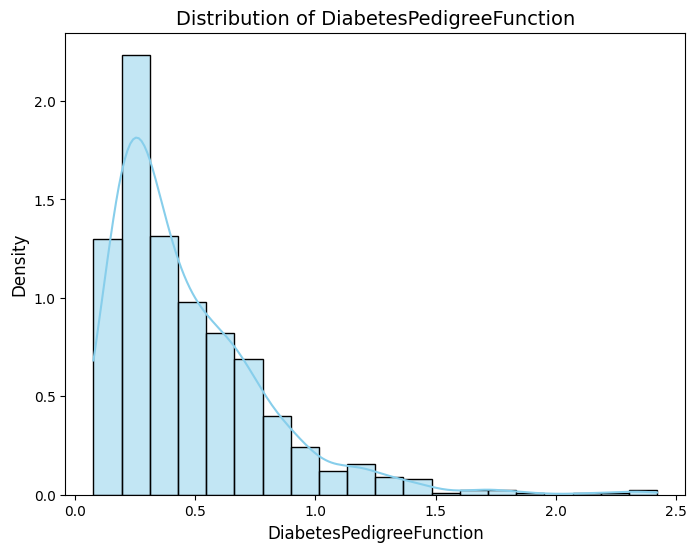

Summary statistics for Age:
count   768.000
mean     33.241
std      11.760
min      21.000
25%      24.000
50%      29.000
75%      41.000
max      81.000
Name: Age, dtype: float64

Quantiles:
0.050   21.000
0.100   22.000
0.200   23.000
0.300   25.000
0.400   27.000
0.500   29.000
0.600   33.000
0.700   38.000
0.800   42.600
0.900   51.000
0.950   58.000
0.990   67.000
Name: Age, dtype: float64

########################################


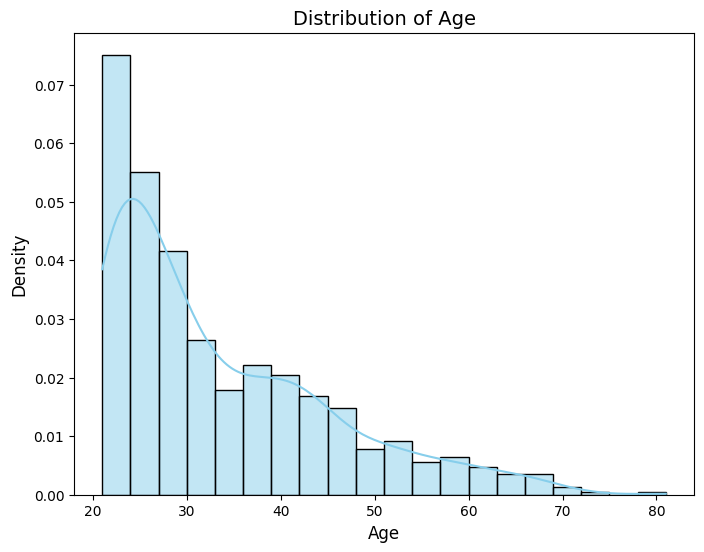

In [22]:
for col in num_cols:
    try:
        num_summary(df, col, plot=True)  # Apply num_summary for each numerical column
    except ValueError as e:
        print(f"Error with column '{col}': {e}")

The summary statistics and quantile analysis for the numerical variables reveal important insights into the dataset:

- **Pregnancies**: The number of pregnancies varies between 0 and 17, with a mean of 3.85 and a standard deviation of 3.37. The distribution is skewed, with a significant portion of individuals having between 0 and 6 pregnancies, as indicated by the median and quantile values.
  
- **Glucose**: The glucose levels range from 0 to 199, with a mean of 120.9. A large portion of the data lies between 79 and 167, with some extreme values near the higher end. The quantiles suggest that higher glucose levels are less frequent but still occur in the dataset.

- **BloodPressure**: Blood pressure values span from 0 to 122, with a mean of 69.1. The quantiles indicate that the majority of values are within the 60-90 range, while values closer to the higher end (above 100) are rare.

- **SkinThickness**: The values for skin thickness range from 0 to 99, with a significant number of zeros, indicating missing or possibly invalid data. The median is 23, and the values are spread fairly evenly across the range, with a few higher values up to 99.

- **Insulin**: The insulin values also range from 0 to 846, with the majority of the data clustered around lower values (0-300). High insulin values are rare but can reach significantly higher values, indicating potential outliers or special cases.

- **BMI (Body Mass Index)**: The BMI values range from 0 to 67.1, with a mean of 31.99 and a significant spread (standard deviation of 7.88). The median is 32, and the majority of values lie between 27 and 44, indicating a diverse distribution.

- **DiabetesPedigreeFunction**: This variable measures the likelihood of diabetes based on family history. The values range from 0.078 to 2.42, with a mean of 0.47. Most individuals have values between 0.244 and 1.

### Analysis of Categorical Variables by Target

In this analysis, we explore the relationship between categorical variables and the target variable (Outcome). We calculate the mean of the target variable for each category in the categorical columns. This helps us understand how the different categories influence the outcome.

The function `target_summary_with_cat` is used to compute the mean of the target variable grouped by each unique value of the categorical columns. If required, a bar plot is also generated to visually represent the relationship between the categorical variable and the target.

This analysis is particularly useful for understanding how different categories of a variable contribute to the target, and helps identify patterns or trends that might not be immediately obvious from numerical statistics alone.


In [33]:
def target_summary_with_cat(dataframe, target, categorical_col, plot=False):
    # Group the DataFrame by the categorical column and calculate the mean of the target variable
    print(pd.DataFrame({'TARGET_MEAN': dataframe.groupby(categorical_col)[target].mean()}), end='\n\n\n')

    # If plot=True is passed, generate a plot
    if plot:
        # Create a barplot to visualize the mean of the target variable by category
        sns.barplot(x=categorical_col, y=target, data=dataframe)

        # Display the plot
        plt.show(block=True)

         TARGET_MEAN
Outcome             
0              0.000
1              1.000




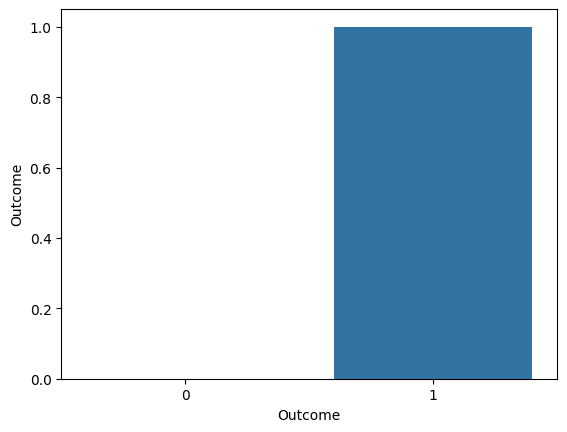

In [34]:
# Iterate through categorical columns and generate target summaries
for col in cat_cols:
    if col in df.columns:
        target_summary_with_cat(df, "Outcome", col, plot=True)
    else:
        print(f"Column '{col}' is not found in the dataframe.")

### Analysis of Numeric Variables by Target

In this section, we analyze the relationship between numerical variables and the target variable (Outcome). By grouping the data based on the target variable, we compute the mean of each numerical feature for both the positive and negative classes of the target. This provides insights into how the numerical variables differ between the two target outcomes.

The `target_summary_with_num` function is used to calculate the mean values of the numerical features for each category of the target variable. Additionally, if specified, a bar plot is generated to visually compare the means of the numerical variables for both classes of the target.

This analysis is important for identifying patterns and differences between the classes of the target, helping to determine which numerical features are most influential in predicting the outcome.


In [35]:
def target_summary_with_num(dataframe, target, numerical_col, plot=False):
    print(pd.DataFrame({numerical_col+'_mean': dataframe.groupby(target)[numerical_col].mean()}), end='\n\n\n')
    if plot:
        sns.barplot(x=target, y=numerical_col, data=dataframe)
        plt.show(block=True)

         Pregnancies_mean
Outcome                  
0                   3.298
1                   4.866




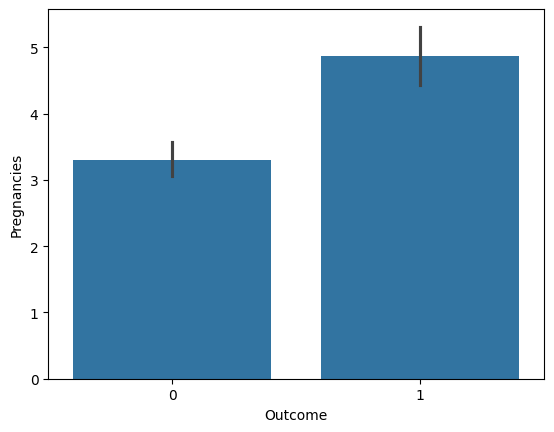

         Glucose_mean
Outcome              
0             109.980
1             141.257




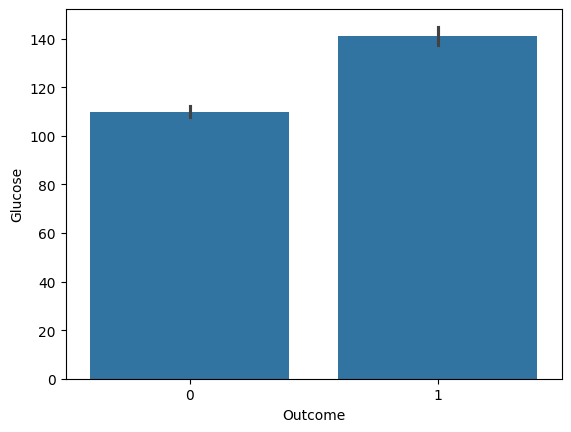

         BloodPressure_mean
Outcome                    
0                    68.184
1                    70.825




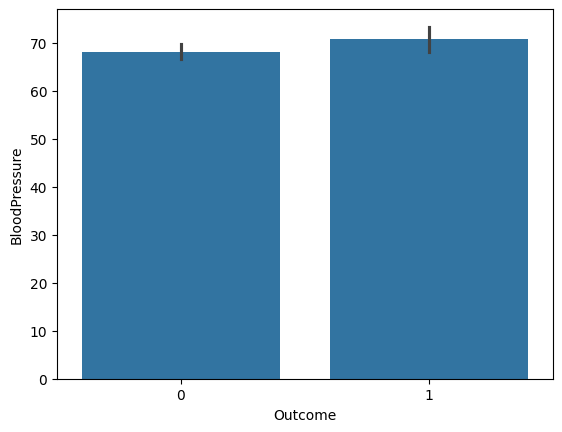

         SkinThickness_mean
Outcome                    
0                    19.664
1                    22.164




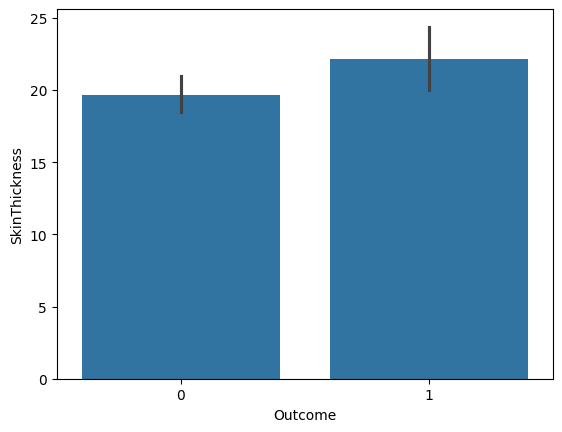

         Insulin_mean
Outcome              
0              68.792
1             100.336




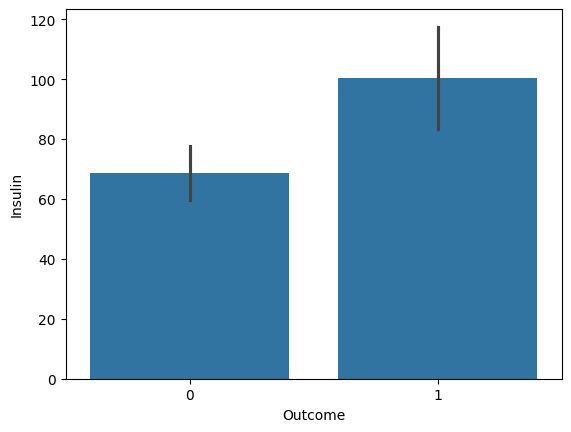

         BMI_mean
Outcome          
0          30.304
1          35.143




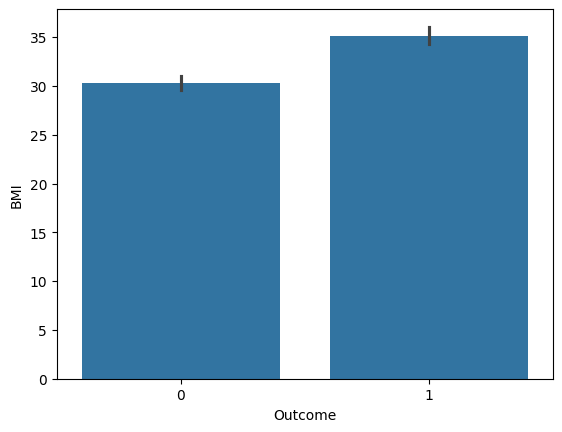

         DiabetesPedigreeFunction_mean
Outcome                               
0                                0.430
1                                0.550




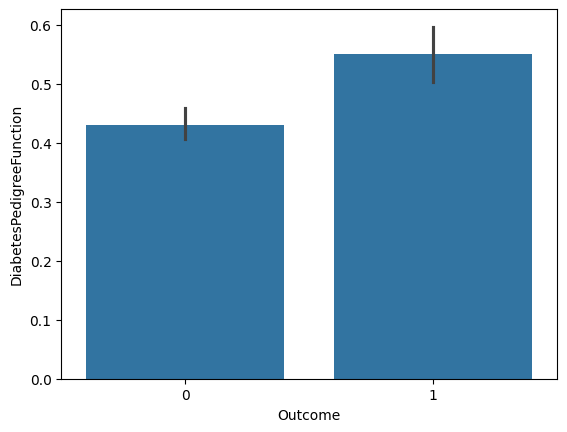

         Age_mean
Outcome          
0          31.190
1          37.067




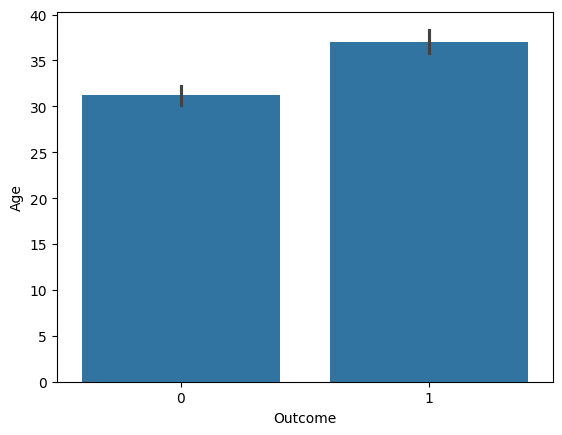

In [36]:
for col in num_cols:
    target_summary_with_num(df, "Outcome", col, plot=True)

The following summary presents the average (mean) values of each feature grouped by the target variable (`Outcome`), where `Outcome` represents whether a person has diabetes (1) or not (0):

- **Pregnancies**:
  - Mean number of pregnancies for non-diabetic individuals (Outcome=0): **3.298**
  - Mean number of pregnancies for diabetic individuals (Outcome=1): **4.866**
  
- **Glucose**:
  - Mean glucose level for non-diabetic individuals: **109.980**
  - Mean glucose level for diabetic individuals: **141.257**

- **BloodPressure**:
  - Mean blood pressure for non-diabetic individuals: **68.184**
  - Mean blood pressure for diabetic individuals: **70.825**

- **SkinThickness**:
  - Mean skin thickness for non-diabetic individuals: **19.664**
  - Mean skin thickness for diabetic individuals: **22.164**

- **Insulin**:
  - Mean insulin level for non-diabetic individuals: **68.792**
  - Mean insulin level for diabetic individuals: **100.336**

- **BMI (Body Mass Index)**:
  - Mean BMI for non-diabetic individuals: **30.304**
  - Mean BMI for diabetic individuals: **35.143**

- **DiabetesPedigreeFunction**:
  - Mean diabetes pedigree function for non-diabetic individuals: **0.430**
  - Mean diabetes pedigree function for diabetic individuals: **0.550**

- **Age**:
  - Mean age for non-diabetic individuals: **31.190**
  - Mean age for diabetic individuals: **37.067**


### Key Insights:

1. **Pregnancies**: Diabetic individuals tend to have more pregnancies on average compared to non-diabetic individuals.
2. **Glucose**: Glucose levels are significantly higher in diabetic individuals, which aligns with the condition.
3. **Blood Pressure**: There is a slight increase in average blood pressure for diabetic individuals.
4. **Skin Thickness**: Diabetic individuals have slightly thicker skin on average compared to non-diabetic individuals.
5. **Insulin**: Diabetic individuals show higher insulin levels, which is common due to insulin resistance.
6. **BMI**: Diabetic individuals have a higher average BMI, which could be a risk factor for diabetes.
7. **Diabetes Pedigree Function**: The diabetes pedigree function is higher in diabetic individuals, indicating a familial link.
8. **Age**: Diabetic individuals are, on average, older than non-diabetic individuals.

These results can provide useful insights into factors that might be associated with diabetes, and the differences in these variables between the two groups are crucial for further analysis and predictive modeling.
